# pyray examples

** Scott Prahl **

** May 2018 **


In [1]:
import copy
import matplotlib.pyplot as plt
import numpy as np
import pyray

# Aligning a Fabry-Perot Interferometer

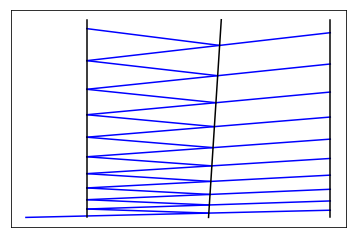

In [2]:
d1 = 1  # z location of first mirror
d2 = 3  # z location of second mirror
d3 = 5  # z location of screen

degrees = np.pi / 180
incidence = 5 * degrees  # angle of incidence of light from normal on mirror 1
tilt = -1 * degrees  # angle of tilt of mirror2

r = pyray.Ray([0, 0, 0], [0, np.sin(incidence), np.cos(incidence)])

mirror1 = pyray.Plane([0, 0, d1], [0, 0, 1])
mirror2 = pyray.Plane([0, 0, d2], [0, np.sin(tilt), np.cos(tilt)])
screen = pyray.Plane([0, 0, d3], [0, 0, 1])

for i in range(10):
    d = screen.distance(r)
    r.move(d, draw_zy=True)

    d = mirror2.distance(r)
    r.move(d)

    r.reflect_from_plane(mirror2)
    d = mirror1.distance(r)
    r.move(d, draw_zy=True)
    r.reflect_from_plane(mirror1)

mirror1.draw_zy(ymax=12)
mirror2.draw_zy(ymax=12)
screen.draw_zy(ymax=12)
plt.xticks([])
plt.yticks([])

plt.show()

# Ray intersection with sphere

center=[1.80,0.00,3.10], radius = 2.000000


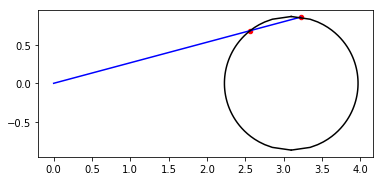

In [3]:
d1 = 3.1  # z location of center of sphere
R = 2

degrees = np.pi / 180
incidence = 15 * degrees  # angle of incidence of light from normal on mirror 1

r = pyray.Ray([0, 0, 0], [0, np.sin(incidence), np.cos(incidence)])

sphere = pyray.Sphere([1.8, 0, d1], R)
plt.axes().set_aspect("equal")

print(sphere)
d = sphere.distance(r)
r.move(d, draw_zy=True)
plt.scatter([r.xyz[2]], [r.xyz[1]], s=20, color="red")

d = sphere.distance(r)
r.move(d, draw_zy=True)
plt.scatter([r.xyz[2]], [r.xyz[1]], s=20, color="red")


sphere.draw_zy()
# plt.xticks([])
# plt.yticks([])

plt.show()

# Basic focusing by lens

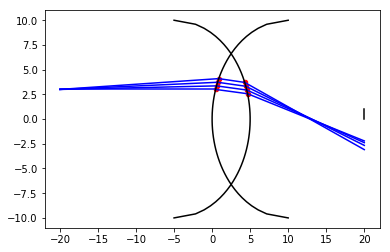

In [4]:
d1 = 3.1  # z location of vertex of lens
f = 10

degrees = np.pi / 180

lens = pyray.ThinLens([0, 0, 0], f)

screen = pyray.Plane([0, 0, 2 * f], [0, 0, 1])
for i in [0, 1, 2, 3]:
    incidence = i * degrees  # angle of incidence of light from normal on lens
    r = pyray.Ray([0, 3, -2 * f], [0, np.sin(incidence), np.cos(incidence)])

    # move to front surface of lens
    d = lens.distance(r, 1)
    r.move(d, draw_zy=True)
    plt.scatter([r.xyz[2]], [r.xyz[1]], s=20, color="red")

    # move to back surface of lens
    r.uvw = lens.refract(r, 1)
    d = lens.distance(r, 2)
    r.move(d, draw_zy=True)
    plt.scatter([r.xyz[2]], [r.xyz[1]], s=20, color="red")

    # move to screen
    r.uvw = lens.refract(r, 2)
    d = screen.distance(r)
    r.move(d, draw_zy=True)

lens.draw_zy()
screen.draw_zy()
# plt.xticks([])
# plt.yticks([])

plt.show()

# Focusing in a Fabry Perot interferometer

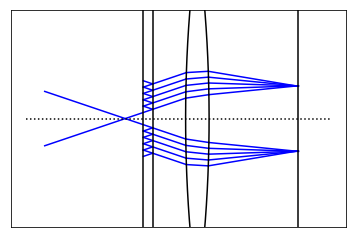

In [5]:
f = 20  # focal length of lens
d0 = -f  # start of ray
d1 = 1  # z location of first mirror
d2 = 3  # z location of second mirror
d3 = 10  # z location of lens
d4 = d3 + f + 4  # z location of screen
y0 = 6  # y location of centerline

degrees = np.pi / 180
incidence = 5 * degrees  # angle of incidence of light from normal on mirror 1
tilt = 0 * degrees  # angle of tilt of mirror2

r = pyray.Ray([0, y0 - y0 / 4, -f], [0, np.sin(incidence), np.cos(incidence)])

mirror1 = pyray.Plane([0, 0, d1], [0, 0, 1])
mirror2 = pyray.Plane([0, 0, d2], [0, np.sin(tilt), np.cos(tilt)])

lens = pyray.ThinLens([0, y0, d3], f)

screen = pyray.Plane([0, 0, d3 + f + 4], [0, 0, 1])

for i in range(5):

    rlens = copy.deepcopy(r)

    # move to front surface of lens
    d = lens.distance(rlens, 1)
    rlens.move(d, draw_zy=True)

    # move to back surface of lens
    rlens.uvw = lens.refract(rlens, 1)
    d = lens.distance(rlens, 2)
    rlens.move(d, draw_zy=True)

    # move to screen
    rlens.uvw = lens.refract(rlens, 2)
    d = screen.distance(rlens)
    rlens.move(d, draw_zy=True)

    # move other second mirror
    d = mirror2.distance(r)
    r.move(d)

    # draw reflection back to first mirror
    r.reflect_from_plane(mirror2)
    d = mirror1.distance(r)
    r.move(d, draw_zy=True)
    r.reflect_from_plane(mirror1)

incidence *= -1  # angle of incidence of light from normal on mirror 1
r = pyray.Ray([0, y0 + y0 / 4, -f], [0, np.sin(incidence), np.cos(incidence)])

for i in range(5):

    rlens = copy.deepcopy(r)

    # move to front surface of lens
    d = lens.distance(rlens, 1)
    rlens.move(d, draw_zy=True)

    # move to back surface of lens
    rlens.uvw = lens.refract(rlens, 1)
    d = lens.distance(rlens, 2)
    rlens.move(d, draw_zy=True)

    # move to screen
    rlens.uvw = lens.refract(rlens, 2)
    d = screen.distance(rlens)
    rlens.move(d, draw_zy=True)

    # move other second mirror
    d = mirror2.distance(r)
    r.move(d)

    # draw reflection back to first mirror
    r.reflect_from_plane(mirror2)
    d = mirror1.distance(r)
    r.move(d, draw_zy=True)
    r.reflect_from_plane(mirror1)


plt.plot([1.2 * d0, 1.2 * d4], [y0, y0], ":k")
mirror1.draw_zy(ymax=12)
mirror2.draw_zy(ymax=12)
lens.draw_zy()
screen.draw_zy(ymax=12)
plt.xticks([])
plt.yticks([])
plt.ylim(0, 12)

plt.show()